# Grounding DINO를 이용한 실시간 흉기 난동 감지

##GPU 연결 및 파일 경로 지정

In [ ]:
!nvidia-smi

Fri May 31 02:05:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os

%cd /content/drive/MyDrive/Grounding_DINO

HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/Grounding_DINO
/content/drive/MyDrive/Grounding_DINO


## Grounding DINO 설치

In [ ]:
# Grunding DINO Github을 통해 소스 다운로드
%cd {HOME}

/content/drive/MyDrive/Grounding_DINO


In [ ]:
!git clone https://github.com/IDEA-Research/GroundingDINO.git

Cloning into 'GroundingDINO'...
remote: Enumerating objects: 443, done.
remote: Counting objects: 100% (212/212), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 443 (delta 158), reused 139 (delta 130), pack-reused 231
Receiving objects: 100% (443/443), 12.86 MiB | 12.66 MiB/s, done.
Resolving deltas: 100% (229/229), done.


In [ ]:
# tourch, roboflow 를 설치
%pip install torch
%cd {HOME}/GroundingDINO
%pip install -q -e .
%pip install -q roboflow

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
# 설치 확인
import os

CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

/content/drive/MyDrive/Grounding_DINO/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [ ]:
# checkpoint 다운로드
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

import os

WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

/content/drive/MyDrive/Grounding_DINO
/content/drive/MyDrive/Grounding_DINO/weights
/content/drive/MyDrive/Grounding_DINO/weights/groundingdino_swint_ogc.pth ; exist: True


## Grounding DINO model 로드

In [ ]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model(CONFIG_PATH, WEIGHTS_PATH)

/content/drive/MyDrive/Grounding_DINO/GroundingDINO


final text_encoder_type: bert-base-uncased


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

## 이미지에서 흉기를 들고 있는 사람 감지하기

SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


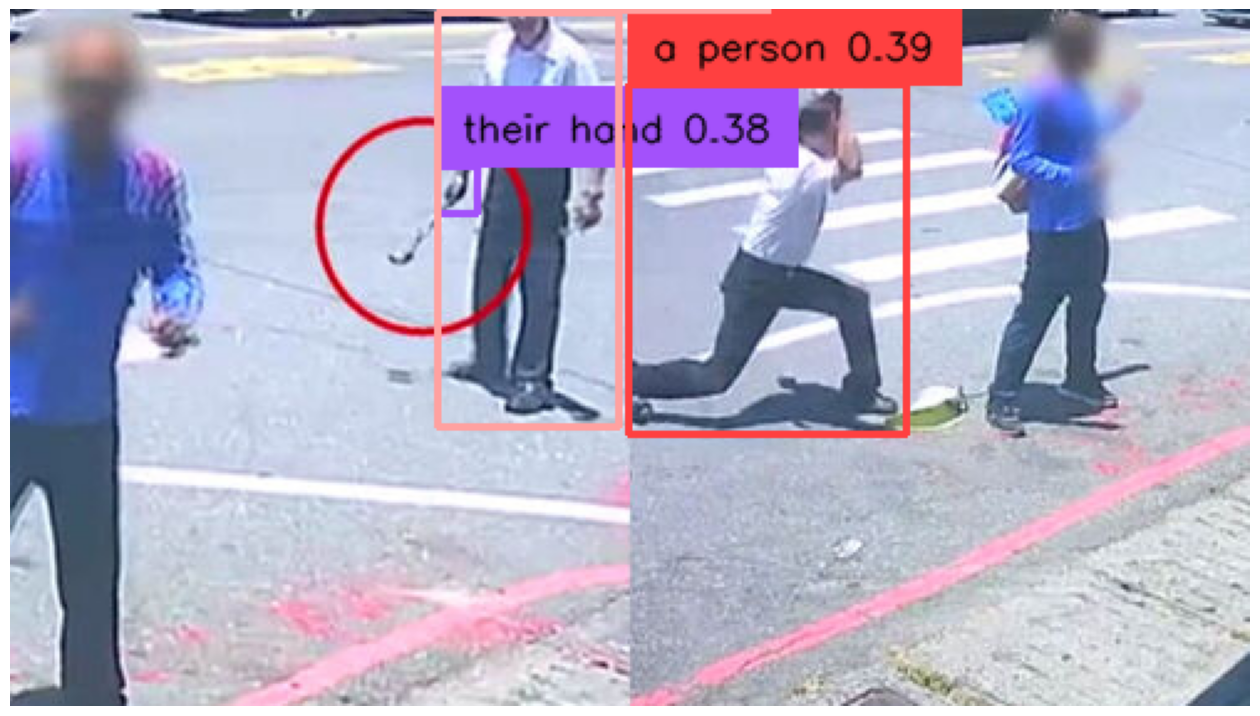

In [ ]:
import os
import supervision as sv

# 흉기를 들고 있는 사람 이미지를 /content/data 폴더 내부에 넣어주었다.
IMAGE_NAME = "1.jpg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

# 객체 인식에 사용될 임계값 설정
TEXT_PROMPT = "A person with a deadly weapon in their hand"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

# 이미지 로드
image_source, image = load_image(IMAGE_PATH)

# 모델을 이용해 특정 객체 인식
boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

# 이미지 시각화
%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

## 영상에서 흉기를 들고 있는 사람 감지하기

In [ ]:
import os
import cv2
from tqdm import tqdm
import supervision as sv
import tempfile

text_prompt = "A person with a knife in their hand"
input_video_path = os.path.join(HOME + "data/source_video.mp4")
output_video_path = os.path.join(HOME + "output/source_video.mp4")
output_knife_path = os.path.join(HOME + "/output/output_knife")
output_no_knife_path = os.path.join(HOME + "/output/output")

# Create output directories if they don't exist
os.makedirs(output_knife_path, exist_ok=True)
os.makedirs(output_no_knife_path, exist_ok=True)

# 동영상 파일 읽기
cap = cv2.VideoCapture(input_video_path)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Get the video width/height
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# 동영상 파일 만들기
video = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), 30, (width, height))

# 각 프레임에 대해
for _ in tqdm(range(frame_count)):

    # Read the frame
    ret, frame = cap.read()

    # Save the frame to a temporary file
    temp_filename = tempfile.mktemp(suffix='.jpg')
    cv2.imwrite(temp_filename, frame)

    # Process the image
    processed_frame, phrases = process_image(temp_filename, model, text_prompt)

    # Remove the temporary file
    os.remove(temp_filename)

    # 칼이 포함된 프레임 이미지
    if 'knife' in phrases:
        save_path = os.path.join(output_knife_path, f"frame_{_}.jpg")
    # 칼이 포함되어 있지 않은 이미지
    else:
        save_path = os.path.join(output_no_knife_path, f"frame_{_}.jpg")

    # 이미지 저장
    cv2.imwrite(save_path, processed_frame)

    # 동영상에 프레임 추가
    video.write(processed_frame)

# 동영상 파일 닫기
video.release()
cap.release()